In [1]:
from utils import * 
from src.entrez import * 

%load_ext autoreload 
%autoreload 2

In [2]:
# The next goal is to look for other similar ECEs in other environmental samples. 

# Several hits in ggKbase https://ggkbase.berkeley.edu/19kb_ECE/organisms 

# https://www.meta-virome.org/, which also seems to be down. 
# Mgnify, which seems to be down.
# NCBI database

In [3]:
# BLASTp search of ECE proteins against NCBI nr database, with 200 hits and a maximum E-value of 0.01. 
blast_df = BLASTFileJSON().from_file('../data/blast/linear_ece_19kb-ncbi_nr.json').to_df()
protein_ids = blast_df.subject_id.unique()

In [42]:
# metadata_df = entrez_protein_get_metadata(protein_ids, path='../data/linear_ece_19kb_blast_metadata.csv')
metadata_df = pd.read_csv('../data/linear_ece_19kb_blast_metadata.csv', index_col=0)
# PLN is plant and fungal sequences, BCT is bacterial, ENV is environmental samples, INV is invertebrate.
metadata_df = metadata_df[~metadata_df.division.isin(['PLN', 'INV'])].copy()

In [ ]:
metadata_df.ecotype.unique()
metadata_df.source.unique()
metadata_df.organism.unique()
print('Num, hits in the NCBI nr database:', len(metadata_df))
print('Num. hits with an annotated metagenome source:', (~metadata_df.metagenome_source.isnull()).sum())
print('Num. hits with a corresponding SRA:', (~metadata_df['Sequence Read Archive'].isnull()).sum())

# Isolation source pasta MCU4954520.1. 

Num, hits in the NCBI nr database: 439
Num. hits with an annotated metagenome source: 207
Num. hits with a corresponding SRA: 46


In [74]:
metadata_df.metagenome_source.unique()

metagenome_source_map = dict()
metagenome_source_map['marine sediment metagenome'] = 'sediment, marine'
metagenome_source_map['soil metagenome'] = 'soil'
metagenome_source_map['nan'] = 'not specified'
metagenome_source_map['peat metagenome'] = 'freshwater'
metagenome_source_map['Soil metagenome'] = 'soil'
metagenome_source_map['cave metagenome'] = 'biofilm' # SAMN48691648, seems like biofilm from a cave wall. 
metagenome_source_map['hot springs metagenome'] = 'freshwater'
metagenome_source_map['Sediment metagenome'] = 'sediment, marine' # I checked, this is marine (e.g. MGB3057950.1).
metagenome_source_map['freshwater sediment metagenome'] = 'sediment, freshwater'
metagenome_source_map['landfill metagenome'] = 'landfill'
metagenome_source_map['groundwater metagenome'] = 'freshwater'
metagenome_source_map['freshwater metagenome'] = 'freshwater'
metagenome_source_map['gut metagenome'] = 'gut'
metagenome_source_map['aquatic metagenome'] = 'brackish' # SAMN14944587, SAMN16436324, SAMN14944619, SAMN14944589 are from a saline lake, SAMN16436335, SAMN16436382 is brackish (Black Sea)
metagenome_source_map['feces metagenome'] = 'gut'
metagenome_source_map['salt lake metagenome'] = 'brackish'
metagenome_source_map['subsurface metagenome'] = 'freshwater' # These are from the Rifle project, which I think is all aquifers.
metagenome_source_map['anaerobic digester metagenome'] = 'gut'
metagenome_source_map['sediment metagenome'] = 'sediment, brackish' # Seems like they are all subtropic estuary. 
metagenome_source_map['wastewater metagenome'] = 'wastewater'
metagenome_source_map['human gut metagenome'] = 'gut'
metagenome_source_map['hot spring metagenome'] = 'freshwater'
metagenome_source_map['wetland metagenome'] = 'sediment, freshwater' # From the vernal pools. 
metagenome_source_map['cold seep metagenome'] = 'marine'
metagenome_source_map['bioreactor metagenome'] = 'sediment, freshwater' # From a bioreactor like ours.
metagenome_source_map['marine sediment'] = 'marine sediment'
metagenome_source_map['activated sludge metagenome'] = 'activated sludge'
metagenome_source_map['hypersaline lake metagenome'] = 'saline lake'
metagenome_source_map['hydrothermal vent metagenome'] = 'marine'
metagenome_source_map['mine drainage metagenome'] = 'freshwater'
metagenome_source_map['invertebrate metagenome'] = 'gut'
metagenome_source_map['watershed metagenome'] = 'freshwater'
metagenome_source_map['microbial mat metagenome'] = 'none' # SAMN13151186 from a marine biofilm, SAMN10167083 from a riverbed.
metagenome_source_map['stromatolite metagenome'] = 'sediment, brackish'
metagenome_source_map['food fermentation metagenome'] = 'food'
metagenome_source_map['lichen metagenome'] = 'lichen'
metagenome_source_map['marine metagenome'] = 'marine'
metagenome_source_map['ice metagenome'] = 'ice'
metagenome_source_map['fish gut metagenome'] = 'gut'
metagenome_source_map['rhizosphere metagenome'] = 'soil'
metagenome_source_map['ant fungus garden metagenome'] = 'fungus'
metagenome_source_map['pig gut metagenome'] = 'gut'
metagenome_source_map['Human Metagenome'] = 'human'
metagenome_source_map['drinking water metagenome'] = 'freshwater' 
metagenome_source_map['groundwater'] = 'freshwater'

metadata_df = metadata_df[~metadata_df.metagenome_source.isnull()].copy()
metadata_df['metagenome_source'] = metadata_df.metagenome_source.map(metagenome_source_map)

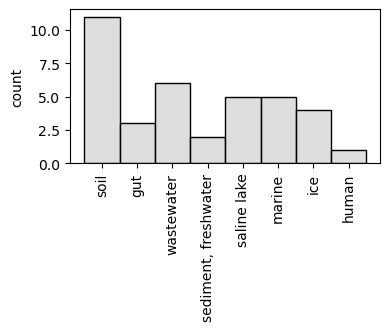

In [80]:
fig, ax = plt.subplots(figsize=(4, 2))
sns.histplot(metadata_df[~metadata_df['Sequence Read Archive'].isnull()], x='metagenome_source', color='lightgray')
ax.set_ylabel('count')
ax.set_xlabel('')
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
metadata_df[~metadata_df['Sequence Read Archive'].isnull()].BioProject.value_counts()
# 15 from PRJNA823399, landfill metagenome. 
# 11 from PRJNA1023754, deep subsurface groundwater. https://pubmed.ncbi.nlm.nih.gov/39421601/ 
# 11 from PRJNA983538, in soil. https://pmc.ncbi.nlm.nih.gov/articles/PMC10640626/ 
# 9 PRJNA640378 from shallow groundwater. https://www.biorxiv.org/content/10.1101/2020.05.14.094862v1, Banfield Lab paper. 
# 8 from PRJNA544494, hot springs in China. https://pmc.ncbi.nlm.nih.gov/articles/PMC11094006/ 
# 7 from PRJNA627556, groundwater. 
# 6 from PRJNA925477 activated sludge. PRJNA925477


BioProject
PRJNA983538     11
PRJNA925477      6
PRJNA847603      5
PRJNA1160706     4
PRJDB16196       2
PRJNA1178125     1
PRJNA1060349     1
PRJNA593905      1
PRJNA481422      1
PRJNA1158959     1
PRJNA573942      1
Name: count, dtype: int64